In [285]:
from __future__ import print_function, division

%matplotlib inline
import nsfg
import numpy as np
import random
import pandas as pd
import thinkstats2
import thinkplot
from scipy import stats
stats.ttest_ind

<function scipy.stats.stats.ttest_ind>

In [286]:
import nsfg

In [299]:
# Reading the file
players = pd.read_csv("basketball_players.csv")
awards = pd.read_csv("basketball_awards_players.csv")

In [302]:
#my colums which I am using
print(awards.columns)

Index([u'playerID', u'award', u'year', u'lgID', u'note', u'pos'], dtype='object')


In [303]:
#my colums which I am using
print(players.columns)

Index([u'playerID', u'year', u'stint', u'tmID', u'lgID', u'GP', u'GS',
       u'minutes', u'points', u'oRebounds', u'dRebounds', u'rebounds',
       u'assists', u'steals', u'blocks', u'turnovers', u'PF', u'fgAttempted',
       u'fgMade', u'ftAttempted', u'ftMade', u'threeAttempted', u'threeMade',
       u'PostGP', u'PostGS', u'PostMinutes', u'PostPoints', u'PostoRebounds',
       u'PostdRebounds', u'PostRebounds', u'PostAssists', u'PostSteals',
       u'PostBlocks', u'PostTurnovers', u'PostPF', u'PostfgAttempted',
       u'PostfgMade', u'PostftAttempted', u'PostftMade', u'PostthreeAttempted',
       u'PostthreeMade', u'note'],
      dtype='object')


In [304]:
#Data index
players = players.set_index(['playerID', 'year'])

In [305]:
MVP=awards.loc[awards['award']== 'Most Valuable Player']
#take only award=most valuable players

In [292]:
MVP

,playerID,award,year,lgID,note,pos
104,pettibo01,Most Valuable Player,1955,NBA,NaN,NaN
116,cousybo01,Most Valuable Player,1956,NBA,NaN,NaN
128,russebi01,Most Valuable Player,1957,NBA,NaN,NaN
140,pettibo01,Most Valuable Player,1958,NBA,NaN,NaN
152,chambwi01,Most Valuable Player,1959,NBA,NaN,NaN
164,russebi01,Most Valuable Player,1960,NBA,NaN,NaN
176,russebi01,Most Valuable Player,1961,NBA,NaN,NaN
188,russebi01,Most Valuable Player,1962,NBA,NaN,NaN
200,roberos01,Most Valuable Player,1963,NBA,NaN,NaN
212,russebi01,Most Valuable Player,1964,NBA,NaN,NaN


In [295]:
players.describe()

,stint,GP,GS,minutes,points,oRebounds,dRebounds,rebounds,assists,steals,...,PostSteals,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade
count,23751.000000,23751.000000,23751.000000,23751.000000,23751.000000,23751.000000,23751.000000,23751.000000,23751.000000,23751.000000,...,23751.000000,23751.000000,23751.000000,23751.000000,23751.000000,23751.000000,23751.000000,23751.000000,23751.000000,23751.000000
mean,1.034651,47.964338,0.935624,1097.296661,492.130689,50.382594,112.825271,209.064208,107.060376,29.347733,...,1.768431,1.193844,3.518378,7.878363,27.076544,12.292072,9.505873,7.163446,2.621742,0.918530
std,0.440119,27.818925,6.935694,993.764138,503.053318,69.506573,148.146626,238.276611,135.377884,39.044928,...,4.937096,4.441420,16.480370,15.258430,59.283753,27.441882,22.478324,17.131901,10.623536,3.939732
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,22.000000,0.000000,137.000000,81.000000,0.000000,0.000000,23.000000,11.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,53.000000,0.000000,866.000000,329.000000,20.000000,52.000000,133.000000,58.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,75.000000,0.000000,1898.000000,758.500000,75.000000,173.000000,308.000000,152.000000,47.000000,...,0.000000,0.000000,1.000000,10.000000,26.000000,11.000000,8.000000,6.000000,0.000000,0.000000
max,5.000000,84.000000,82.000000,3882.000000,4029.000000,895.000000,1111.000000,2149.000000,1164.000000,354.000000,...,66.000000,92.000000,2121.000000,520.000000,661.000000,306.000000,296.000000,205.000000,151.000000,58.000000


In [306]:
players=pd.merge(players, MVP) #merge two value

MemoryError: 

In [247]:
awards= awards.groupby(['playerID','year']).sum()

In [307]:
data = pd.read_csv('basketball_players.csv')
points = data.points
assists= data.assists
print (points)
print (assists)
#take value of points and assists

0        527
1         65
2          0
3        138
4        295
5        631
6        108
7         13
8         41
9        713
10         6
11       567
12        34
13       264
14         0
15       453
16       210
17        17
18       845
19       256
20       630
21       238
22       227
23         0
24         6
25        10
26       528
27       287
28        84
29        14
        ... 
23721    494
23722    155
23723    225
23724    339
23725    373
23726    122
23727    128
23728    268
23729     69
23730    301
23731    275
23732    447
23733     50
23734    213
23735     95
23736    350
23737    221
23738    212
23739    101
23740      0
23741    496
23742    208
23743     59
23744    145
23745    314
23746    467
23747    356
23748    355
23749      4
23750    195
Name: points, Length: 23751, dtype: int64
0         35
1         20
2          0
3         16
4         54
5         54
6         14
7          1
8         15
9         37
10         0
11        60
12       

In [249]:
(data.points.values)

array([527,  65,   0, ..., 355,   4, 195], dtype=int64)

In [250]:
(data.assists.values)

array([ 35,  20,   0, ..., 134,   3,  32], dtype=int64)

In [251]:
mean_points=(points.mean())
print (mean_points)
#mean of points

492.1306892341375


In [308]:
mean_assists=(assists.mean())
print (mean_assists)
#mean of assists

107.060376405204


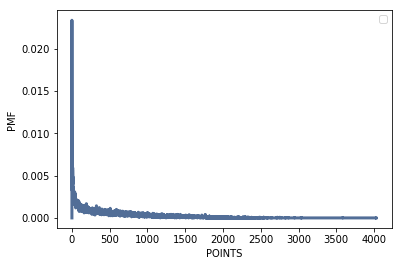

In [309]:
point_pmf=thinkstats2.Pmf(players.points)
thinkplot.Pmf(point_pmf)
thinkplot.Config(xlabel='POINTS', ylabel='PMF')
#plot pmf of point

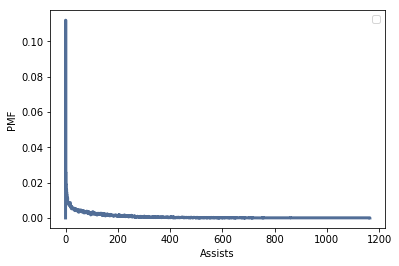

In [310]:
assists_pmf=thinkstats2.Pmf(players.assists)
thinkplot.Pmf(assists_pmf)
thinkplot.Config(xlabel='Assists', ylabel='PMF')
#plot pmf of assists

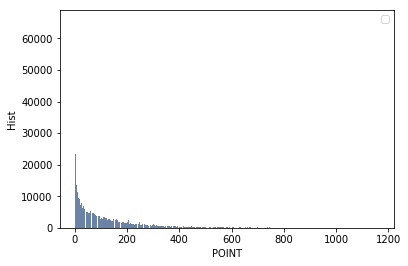

In [311]:
histpoints=thinkstats2.Hist(players.points)
thinkplot.Hist(histplayer)
thinkplot.Config(xlabel='POINT', ylabel='Hist')
#hist of point

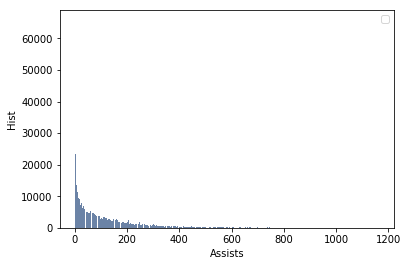

In [312]:
histassists=thinkstats2.Hist(players.assists)
thinkplot.Hist(histplayer)
thinkplot.Config(xlabel='Assists', ylabel='Hist')
#hist of assists

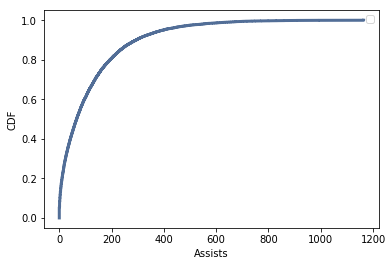

In [257]:
assists_cdf=thinkstats2.Cdf(players.assists)
thinkplot.Cdf(assists_cdf)
thinkplot.Config(xlabel='Assists', ylabel='CDF')

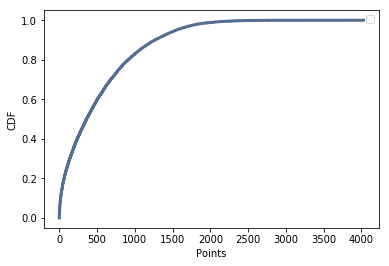

In [258]:
points_cdf=thinkstats2.Cdf(players.points)
thinkplot.Cdf(points_cdf)
thinkplot.Config(xlabel='Points', ylabel='CDF')

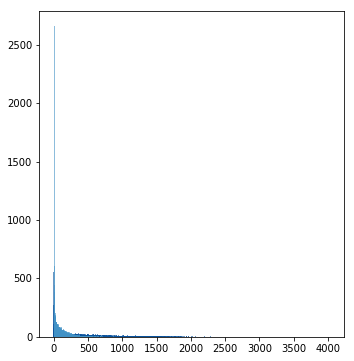

In [259]:
hist_first = thinkstats2.Hist((points), label= 'Points')
hist_second = thinkstats2.Hist((assists), label= 'Assists')
width= 10.0
thinkplot.preplot(2,cols=2)
thinkplot.Hist(hist_first, align='right',width=width)
thinkplot.Hist(hist_second, align='left',width=width)


In [260]:
value_p=points_cdf[0]
value_p
#p value of cdf points

0.01970165417883428

In [313]:
value_p=assists_cdf[0]
value_p
#p value of cdf assists

0.05517741242471355

In [314]:
players['points'].corr(players['assists'])

0.7192603668483227